### Treść zadania

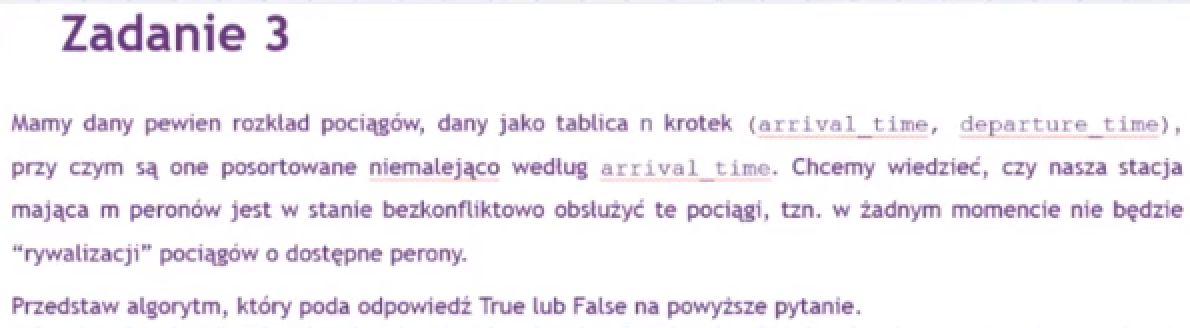
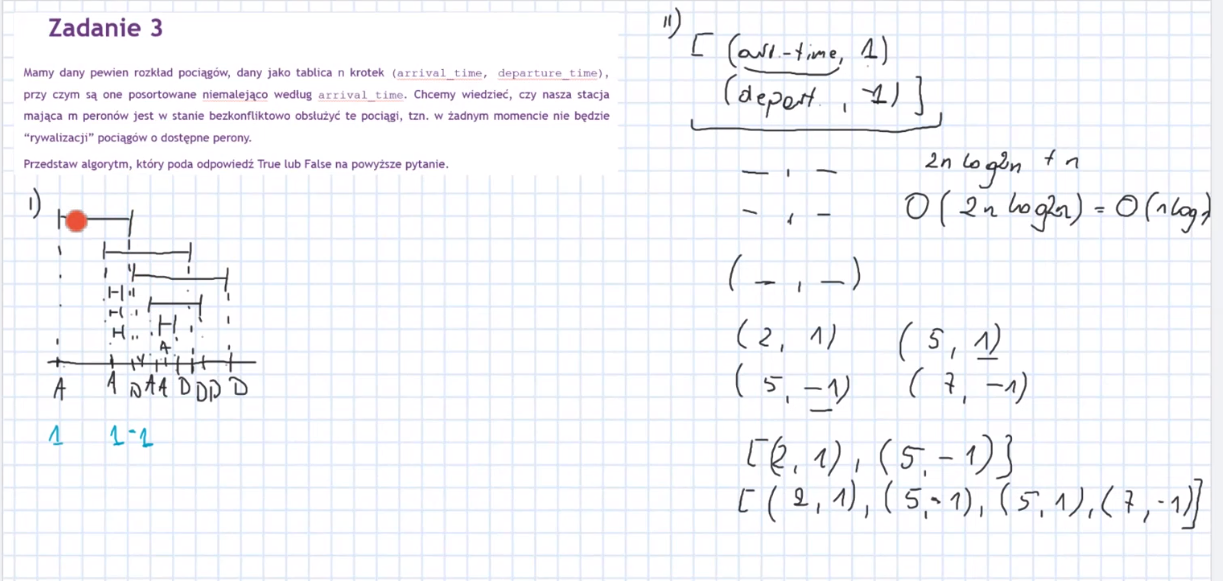

### Omówienie algorytmu

###### Omówienie Implementacji #1:
Zauważmy, że jeżeli chcemy w łatwy sposób uzyskać godziny przyjazdu i odjazdu pociągów w takiej kolejności, w jakiej one następują, przy czym automatycznie zostaną uwzględnione godziny przyjazdu i odjazdu pociągów, najlepiej "rozpakować" wszystkie wartości (początki i końce przedziałów) do jednej tablicy, pamiętając przy tym, która wartość odpowiada godzinie przyjazdu, a która odjazdu i kolejno posortować. Ponieważ uznajemy przedziały za otwarte, tzn. jeżeli czas przyjazdu jednego z pociągów pokrywa się z czasem odjazdu innego, zakładamy, że pociągi ze sobą nie kolidują i ten odjeżdżający zdąży zwolnić miejce na peronie przyjeżdżającemu, chcielibyśmy w posortowanej tablicy mieć najpierw godzinę odjazdu jednego z pociągów, a za nią godzinę przyjazdu innego (dotyczy to tylko sytuacji konfliktowych, bo w ogólności sortujemy po prostu po czasie, niezależnie od tego, czy jest to czas przyjazdu, czy czas odjazdu). Z tego powodu najlepiej zapisać wszystkie czasy jako krotki postaci $ (czas, wartość) $, gdzie $ czas $ jest odpowiednio czasem przyjazdu lub odjazdu, a $ wartość $ odpowiada stanowi, którego dotyczy krotka, niech np. $ -1 $ oznacza godzinę odjazdu pociągu, a $ 1 $ godzinę przyjazdu (ważne jest, aby cyfra, która oznacza godzinę odjazdu pociągu, była mniejsza niż ta, która oznacza godzinę przyjazdu), wówczas mamy pewność, że jeżeli dwa czasy $ czas $ będą takie same, to najpierw w tablicy wystąpi ten, który odpowiada czasowi odjazdu, oznaczonemu przez $ -1 $, a następnie ten, który odpowiada czasowi przyjazdu, oznaczonemu przez $ 1 $.
<br>
Znając już wszystkie konieczne założenia, wystarczy utworzyć tę tablicę rozmiaru $ 2n $ i posortować umieszczone w niej krotki. Ponieważ Python sortuje wartości, patrząc od lewej do prawej, a więc najpierw sortuje po pierwszej wartości z krotki, a dopiero w przypadkach konfliktowych, sortuje on elementy po kolejnych wartościach, ale jedynie w obrębie tych elementów, które mają na wcześniejszych pozycjach takie same wartości, elementy, których część wartości początkowych jest taka sama. Kolejnym krokiem jest przejście liniowe przez posortowaną tablicę i inkrementowanie licznika pociągów, znajdujących się na stacji, w momencie natrafienia na krotkę, odpowiadającą czasowi przyjazdu oraz dekrementowanie licznika, jeżeli natrafimy na krotkę, która odpowiada czasowi odjazdu. Przy każdej inkrementacji licznika musimy sprawdzać, czy stacja nie została właśnie przepełniona.

###### Omówienie implementacji #2 (i #3):
W tym przypadku postąpimy nieco sprytniej, ponieważ utworzymy kopiec wielkości stacji. Musi być to koniecznie kopiec Min Heap, abyśmy mieli zawsze dostęp do najmniejszej wartości. W kopcu będziemy umieszczać jedynie godziny odjazdu pociągów. Zauważmy, że to rozwiązanie jest najlepsze w przypadku tego zadania, ponieważ już na starcie mamy posortowane krotki po czasie przyjazdu pociągów. Dzięki temu będziemy wiedzieć, że zawsze każdy kolejny pociąg, jaki czeka na wjazd na stację, przyjedzie na nią nie później niż kolejne pociągi oczekujące. Algorytm zaczynamy od "wpuszczenia" pierwszego pociagu na stację, czyli dodania jego czasu odjazdu do kopca. Następnie w pętli przechodzimy przez każdy kolejny przyjeżdżający pociąg i, jeżeli jego czas przyjazdu jest wcześniejszy niż czas odjazdu najwcześniej odjeżdżającego pociągu ze stacji, dodajemy go do kopca (do stacji), bo musi on na nią wjechać, mimo, że nie możemy ze stacji wypuścić innego żadnego pociagu, bo czas odjazdu każdego z nich jest późniejszy. Jeżeli natomiast okaże się, że kolejny pociąg, jaki chce wjechać na stację, wjedzie po odjeździe pociągu, który znajduje się na stacji, usuwamy z kopca wszystkie czasu odjazdów, które są mniejsze lub równe (bo zakładamy, że czas odjazdu i czas przyjazdu nie kolidują), a dopiero potem dodajemy czas odjazdu pociągu, który oczekiwał na wjazd na stację (i już może na nią wjechać, bo jego czas przyjazdu jest mniejszy niż czas odjazdu jakiegokolwiek pociągu ze stacji). Jeszcze musimy jakoś sprawdzać, czy stacja nam się nie przepełniła. Jeżeli korzystamy z kopca z limitem miejsca, łatwo to sprawdzimy, bo w chwili przepełnienia nie będzie możliwe dodanie już większej liczby pociągów. Jeżeli natomiast korzystamy z kopca o dynamicznie zmieniającym się rozmiarze, wystarczy sprawdzać, czy tablica, w której przechowywane są wartości z kopca, nie przekroczyła długości równej pojemności stacji.

###### Omówienie implementacji #4:
Implementacja nieco lepsza od #1, ale gorsza od #2 i #3. Na uwagę zasługuje jej prostota oraz przydany sposób podziału danych na 2 posortowane tablice. W tym przypadku, ponieważ mamy powiedziane, że pociągi są posortowane po czasie przyjazdu na stację, wystarczy utworzyć drugą tablicę, w której zapiszemy czasy odjazdu pociągów i je posortujemy. Ponieważ zawsze czas przyjazdu pierwszego pociągu, jaki zjawi się na stacji musi być mniejszy niż czas odjazdu jakiegokolwiek pociagu, porównanie $ times[i][0] < D[j] $ zadziała prawidłowo również w pierwszej iteracji, kiedy $ i = j = 0 $, przez co przesuniemy wskaźnik $ i $ dalej, co będzie oznaczało wjazd pociągu o indeksie $ i $ na stację. W kolejnych pętlach już nie wiemy, czy najpierw ze stacji odjeżdża jakiś pociąg, czy przyjeżdża nowy, więc zawsze wpuścimy nowy pociąg tylko wtedy, gdy wypuścimy ze stacji wszystkie te, których czas odjazdu jest wcześniejszy niż czas przyjazdu kolejnego pociągu (znów warunek $ times[i][0] < D[j] $ nam to załatwia, ponieważ w bloku $ else $ znajduje się operacja $ j += 1 $, oznaczająca wypuszczenie pociągu ze stacji). Nawet nie musimy zapamiętywać liczby pociągów, jakie obecnie się znajdują na stacji, bo będzie to po prostu różnica między indeksem pociągu, który będzie sprawdzany w następnej iteracji oraz indeksem pociągu, który następny odjedzie ze stacji $ i - j $ (jeżeli byśmy przenieśli to sprawdzanie liczby pociagów wiersz wyżej, musielibyśmy wyliczać wartość $ i - j + 1 $, ponieważ różnica między $ i $ indeksem a $ j $ daje nam wartość o 1 mniejszą od liczby elementów, jakie znajdują się w przedziale domkniętym obustronnie $ [i, j] $).

### Złożoność

###### Implementacja #1:
$ O((2n) \cdot log(2n)) = O(n \cdot log(n)) $  - bo sortujemy początki i końce przedziałów,
###### Implementacja #2 (i #3):
$ O(2n \cdot log(m)) $ = $ O(n \cdot log(m)) $ - bo przedziały są już posortowane po czasach przyjazdu, więc jedyne co robimy, to  wrzucamy i wyciągamy każdą z wartości z kopca o rozmiarze maksymalnie $ m $
###### Implementacja #4:
$ O(n \cdot log(n)) $  - bo sortujemy tablicę odjazdów

### Implementacja #1
##### Z sortowaniem czasów przyjazdu i odjazdu

In [1]:
def quick_sort(arr):
    _quick_sort(arr, 0, len(arr) - 1)
    

def _quick_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position)
            left_idx = pivot_position + 1
        else:
            _quick_sort(arr, pivot_position + 1, right_idx)
            right_idx = pivot_position
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[left_idx]
    i = left_idx - 1
    j = right_idx + 1
    while True:
        i += 1
        while arr[i] < pivot: i += 1
            
        j -= 1
        while arr[j] > pivot: j -= 1
        
        if i < j:
            _swap(arr, i, j)
        else:
            return j  # Return a pivot position after the last swap

        
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

    
def trains(times, m):
    temp = []
    for arrival, departure in times:
        temp.append((arrival, 1))
        temp.append((departure, -1))
    
    quick_sort(temp)  # if the same arrival and departure, departure will be first
    
    count = 0
    for time in temp:
        if time[1] == 1: # Arrival
            count += 1
        else:            # Departure
            count -= 1 
        if count > m:
            return False
    return True

###### Kilka testów

In [2]:
t = [(0, 5), (3, 11), (5, 14), (7, 10), (8, 9), (13, 14), (13, 15), (15, 20), (15, 16), 
     (15, 17), (16, 20)]
m = 4

print(trains(t, m))

True


In [3]:
t = [(0, 5), (3, 11), (5, 14), (7, 9), (7, 10), (8, 9), (13, 14), (13, 15), (15, 20), (15, 16), 
     (15, 17), (16, 20)]
m = 4

print(trains(t, m))

False


### Implementacja #2
##### Z użyciem kopca binarnego o dynamicznym rozmiarze

In [4]:
class MinHeap:
    def __init__(self, values=None):
        if values:
            self.heap = list(values) # We make a copy of values in order not to modify them
            self.build_heap()
        else:
            self.heap = []
        
    def __str__(self):  # A 'complete_tree_string' function is required in order to ensure that printing works
        return complete_tree_string(self.heap)
    
    def __bool__(self):
        return bool(self.heap)
    
    def __len__(self):
        return len(self.heap)
    
    @property
    def heap_size(self):
        return len(self.heap)
    
    @staticmethod
    def parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def insert(self, val: object):
        # Add a value as the last node of our Complete Binary Tree
        self.heap.append(val)
        # Fix heap in order to satisfy a min-heap property
        self._heapify_up(self.heap_size - 1)
        
    def get_min(self) -> object:
        return None if not self.heap else self.heap[0]
        
    def remove_min(self) -> object:
        if self.heap_size == 0:
            raise IndexError(f'remove_min from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self.heap[0]
        # Place the last leaf in the root position
        last = self.heap.pop()
        if self.heap_size > 0:
            self.heap[0] = last
            # Fix a heap in order to stisfy a min-heap property
            self._heapify_down(0, self.heap_size)
        return removed
    
    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):  # O(log n)
        while curr_idx > end_idx:
            parent_idx = self.parent_idx(curr_idx)
            if self.heap[curr_idx] < self.heap[parent_idx]:
                self.swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):  # O(log n)
        # Loop till the current node has a child smaller than itself
        # We assume that when we enter a node which both children are
        # larger than this node, a subtree which a current node is a
        # root of must fulfill a min-heap property
        while True:
            l = self.left_child_idx(curr_idx)
            r = self.right_child_idx(curr_idx)
            smallest_idx = curr_idx

            if l < end_idx:
                if self.heap[l] < self.heap[curr_idx]: 
                    smallest_idx = l
                if r < end_idx and self.heap[r] < self.heap[smallest_idx]:
                    smallest_idx = r
        
            if smallest_idx != curr_idx:
                self.swap(curr_idx, smallest_idx)
                curr_idx = smallest_idx
            else:
                break
        
    def build_heap(self):   # O (n)
        for i in range(self.heap_size // 2 - 1, -1, -1):
            self._heapify_down(i, self.heap_size)
    
    
def trains(times: 'must be sorted by arrival times', m):
    n = len(times)
    if n <= m: return True
    
    departures = MinHeap()  # Departures of trains which are already on stations
    departures.insert(times[0][1])
    
    for i in range(1, n):
        # If the next train will arrive after departure of some trains which are
        # on the station, release trains from the station at first
        while departures and times[i][0] >= departures.get_min():
            departures.remove_min()
        departures.insert(times[i][1])
        # If too many trains awaiting for the departure
        if len(departures) > m:
            return False
    return True

###### Kilka testów

In [5]:
t = [(0, 5), (3, 11), (5, 14), (7, 10), (8, 9), (13, 14), (13, 15), (15, 20), (15, 16), 
     (15, 17), (16, 20)]
m = 4

print(trains(t, m))

True


In [6]:
t = [(0, 5), (3, 11), (5, 14), (7, 9), (7, 10), (8, 9), (13, 14), (13, 15), (15, 20), (15, 16), 
     (15, 17), (16, 20)]
m = 4

print(trains(t, m))

False


### Implementacja #3
##### Z użyciem kopca o limitowanym miejcu

In [7]:
class MinHeap:
    def __init__(self, maxsize=128):
        if not isinstance(maxsize, int):
            raise TypeError(f"expected 'int', got {str(type(maxsize))[7:-1]}")
        if maxsize <= 0:
            raise ValueError(f"cannot create a {self.__class__.__name__} of a max size {maxsize}")
        self.heap = [None] * maxsize  # Allocate a constant memory space
        self.size = 0
        self._free_idx = 0
        
    def __str__(self):  # A 'complete_tree_string' function is required in order to ensure that printing works
        return complete_tree_string(self.heap[:self._free_idx])
    
    def __bool__(self):
        return bool(self._free_idx)
    
    def __len__(self):
        return len(self.heap)
    
    @property
    def heap_size(self):
        return self._free_idx
    
    @staticmethod
    def parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def insert(self, val: object):
        if self.heap_size == len(self):
            raise OverflowError(f'insert in a completely filled {self.__class__.__name__}')
        # Add a value as the last node of our Complete Binary Tree
        self.heap[self._free_idx] = val
        # Fix heap in order to satisfy a min-heap property
        self._free_idx += 1
        self._heapify_up(self.heap_size - 1)
        
    def get_min(self) -> object:
        return None if not self.heap else self.heap[0]
        
    def remove_min(self) -> object:
        if self.heap_size == 0:
            raise IndexError(f'remove_min from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self.heap[0]
        # Place the last leaf in the root position
        last_idx = self._free_idx - 1
        last = self.heap[last_idx]
        self.heap[last_idx] = None
        self._free_idx -= 1
        if self.heap_size > 0:
            self.heap[0] = last
            # Fix a heap in order to stisfy a min-heap property
            self._heapify_down(0, self.heap_size)
        return removed
    
    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):  # O(log n)
        while curr_idx > end_idx:
            parent_idx = self.parent_idx(curr_idx)
            if self.heap[curr_idx] < self.heap[parent_idx]:
                self.swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):  # O(log n)
        # Loop till the current node has a child smaller than itself
        # We assume that when we enter a node which both children are
        # larger than this node, a subtree which a current node is a
        # root of must fulfill a min-heap property
        while True:
            l = self.left_child_idx(curr_idx)
            r = self.right_child_idx(curr_idx)
            smallest_idx = curr_idx

            if l < end_idx:
                if self.heap[l] < self.heap[curr_idx]: 
                    smallest_idx = l
                if r < end_idx and self.heap[r] < self.heap[smallest_idx]:
                    smallest_idx = r

            if smallest_idx != curr_idx:
                self.swap(curr_idx, smallest_idx)
                curr_idx = smallest_idx
            else:
                break
                
                
def trains(times: 'must be sorted by arrival times', m):
    n = len(times)
    # Create a station with limited space
    station = MinHeap(m)
    # Let the first train in
    station.insert(times[0][1])
    
    for i in range(1, n):
        while station and times[i][0] >= station.get_min():
            station.remove_min()
        try:
            station.insert(times[i][1])
        except OverflowError:
            return False
    return True

###### Kilka testów

In [8]:
t = [(0, 5), (3, 11), (5, 14), (7, 10), (8, 9), (13, 14), (13, 15), (15, 20), (15, 16), 
     (15, 17), (16, 20)]
m = 4

print(trains(t, m))

True


In [9]:
t = [(0, 5), (3, 11), (5, 14), (7, 9), (7, 10), (8, 9), (13, 14), (13, 15), (15, 20), (15, 16), 
     (15, 17), (16, 20)]
m = 4

print(trains(t, m))

False


### Implementacja #4
##### Znów z sortowaniem, ale na dwóch tablicach

In [10]:
def quick_sort(arr):
    _quick_sort(arr, 0, len(arr) - 1)
    

def _quick_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position)
            left_idx = pivot_position + 1
        else:
            _quick_sort(arr, pivot_position + 1, right_idx)
            right_idx = pivot_position
        
        
def _partition(arr, left_idx, right_idx):
    pivot = arr[left_idx]
    i = left_idx - 1
    j = right_idx + 1
    while True:
        i += 1
        while arr[i] < pivot: i += 1
            
        j -= 1
        while arr[j] > pivot: j -= 1
        
        if i < j:
            _swap(arr, i, j)
        else:
            return j  # Return a pivot position after the last swap

        
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]
    
    
def trains(times: 'must be sorted by arrival times', m):
    n = len(times)
    # Create array of sorted departure times
    D = [None] * n
    for i in range(n):
        D[i] = times[i][1]
    quick_sort(D)
    
    # Go through both arrays and advance the i pointer only if the arrival time is before
    # any of the trains on a train station leaves
    j = i = 0
    while i < n:
        if times[i][0] < D[j]:
            i += 1
            if i - j > m:
                return False
        else:
            j += 1
        
    return True

###### Kilka testów

In [11]:
t = [(0, 5), (3, 11), (5, 14), (7, 10), (8, 9), (13, 14), (13, 15), (15, 20), (15, 16), 
     (15, 17), (16, 20)]
m = 4

print(trains(t, m))

True


In [12]:
t = [(0, 5), (3, 11), (5, 14), (7, 9), (7, 10), (8, 9), (13, 14), (13, 15), (15, 20), (15, 16), 
     (15, 17), (16, 20)]
m = 4

print(trains(t, m))

False
